<h1>Quora Insincere Questions Classification</h1>

<b>Problem Statement: </b>
An existential problem for any major website today is how to handle toxic and divisive content. Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

The aim of the problem is to detect toxic and misleading content in given a question.

An insincere question is defined as a question intended to make a statement rather than look for helpful answers. Some characteristics that can signify that a question is insincere:

<ul>
    <li>Has a non-neutral tone.
        <ul>
            <li>Has an exaggerated tone to underscore a point about a group of people.</li>
            <li>Is rhetorical and meant to imply a statement about a group of people.</li>
        </ul>
    </li>
    <li>Is disparaging or inflammatory.
        <ul>
            <li>Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype.</li>
            <li>Makes disparaging attacks/insults against a specific person or group of people.</li>
            <li>Based on an outlandish premise about a group of people.</li>
            <li>Disparages against a characteristic that is not fixable and not measurable.</li>
        </ul>
    </li>
    <li>Isn't grounded in reality.
        <ul>
            <li>Based on false information, or contains absurd assumptions</li>
        </ul>
    </li>
    <li>Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers.</li>
    
</ul>

Source :: https://www.kaggle.com/c/quora-insincere-questions-classification/overview/description
<br/><br/>

<b>Evaluation Metric: F1 Score</b>

F1-Score = 2 x (precision x recall) / (precision + recall)

<b>Precision:</b> The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

<b>Recall:</b> The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<b>Dataset Description</b>

The dataset is divided into two parts<br/>
<ol>
    <li>Train</li>
    <li>Test</li>
</ol>

<b>1. Train </b>

Number of rows: 1.31 Million records.<br/>
Number of columns: 3 <br/>

Columns:
<ul>
    <li><b>qid: </b> Question Id</li>
    <li><b>question_text: </b> Question text.</li>
    <li><b>target: </b> target whether the question is sincere or not. if question is insincere then target is 1 else 0.</li>    
</ul>

<b>1. Test </b>

Number of rows: 376000 records.<br/>
Number of columns: 2 <br/>

Columns:
<ul>
    <li><b>qid: </b> Question Id</li>
    <li><b>question_text: </b> Question text.</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import f1_score, confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
train_df.shape

(1306122, 3)

In [5]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
test_df.shape

(375806, 2)

### Target Distribution

In [7]:
train_df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

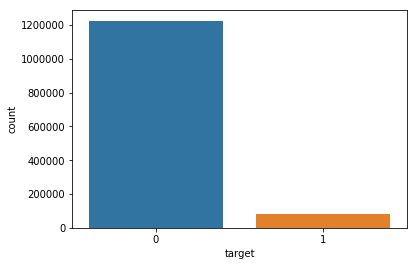

In [8]:
sns.countplot(data=train_df, x='target')
plt.show()

<b>Conclusion:</b>

The above plot clearly shows that the dataset is a imbalanced dataset with over 12,25,312 questions are sincere with target as 0 and 80810 are marked as insincere with target label as 1 

### Check for duplicates, null values

In [9]:
train_df.isnull().isnull().any()

qid              False
question_text    False
target           False
dtype: bool

In [10]:
test_df.isnull().isnull().any()

qid              False
question_text    False
dtype: bool

No missing values are present in the data set

### WordClouds

(-0.5, 399.5, 199.5, -0.5)

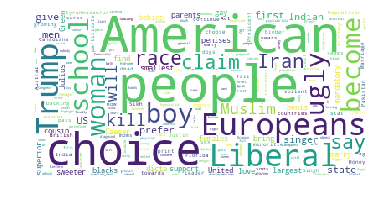

In [11]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=500,
                      max_font_size=60, 
                      random_state=42
                     ).generate(str(train_df[train_df['target'] == 1]['question_text']))
plt.imshow(wordcloud)
plt.axis('off')
# plt.title("Title")

(-0.5, 399.5, 199.5, -0.5)

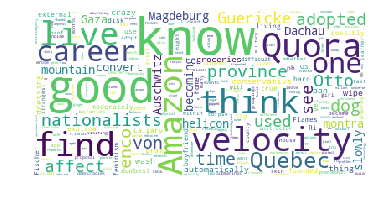

In [12]:
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=500,
                      max_font_size=60, 
                      random_state=42
                     ).generate(str(train_df[train_df['target'] == 0]['question_text']))
plt.imshow(wordcloud)
plt.axis('off')

### Text Analysis

In [13]:
train_df['length'] = train_df['question_text'].apply(lambda x: len(x))

In [14]:
train_df.head()

,qid,question_text,target,length
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77


In [15]:
x = train_df[train_df['length'] == train_df['length'].max()]
print("Question text")
print('='*25)
print(x['question_text'].values[0])
print('='*25)
print("Target for this question:", x['target'].values[0])

Question text
What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan(\tan({\boxed{\int_{1x^0}^{1x^2} \sum_{\varpi=1}^{\infty} \int_{2x^{-3}}^{2x^2} \sum_{\alpha=7}^{\infty} \underbrace{\sqrt[2]{1x^5}}_{\text{Gauss's Law of Theoretical Probability.}} d\tau dx}}^{1x^0})) d\mu}{\int_{2x^{-3}}^{1x^5} \cos(\int_{2x^2}^{1x^{-3}} \frac{\sqrt[2]{\overbrace{\underbrace{\frac{3x^3+3x^5}{\sqrt[3]{2x^{-3}}}}_{\text{Gauss's Law of Theoretical Probability.}} \times \overbrace{\tan(2x^0)}^{\text{Gauss's Law of Theoretical Probability.}}-\sum_{4=7}^{\infty} \boxed{3x^{-5}}}^{\text{Inverse Function.}}}}{{\boxed{\int_{2x^2}^{2x^4} 3x^1 d9} \div \sum_{6=6}^{\infty} \sqrt[3]{2x^2}+\sqrt[4]{\sin(2x^0+3x^0)}}^{2x^{-4}}+\boxed{\frac{\vec{\boxed{\sum_{\gamma=10}^{\infty} 1x^{-5}}}}{\frac{\sum_{\iota=2}^{\infty} 1x^{-5}-\frac{3x^{-1}}{1x^{-4}}}{\sin(\tan(3x^{-2}))}}}} \times \boxed{\sqrt[2]{{{{\sqrt[5]{2x^5}}^{2x^{-1}}}^{2x^{-1}} \div \sum_{\chi=6}^{\infty} \int_{1x^4}^{2x^{-4}} 3x^2 d\vartheta+{2x^{-3}}^{2x^{-5}}}^{3

<b>Conclusion</b>

This question is has lot of math operations like powers mulitplications and all and the interesting part is question has been marked as insincere.

In [16]:
x = train_df[train_df['length'] == train_df['length'].min()]
print("Question text")
print('='*25)
print(x['question_text'].values[0])
print('='*25)
print("Target for this question:", x['target'].values[0])

Question text
"
Target for this question: 1


<b>Conclusion</b>

This question has no text. Interestingly this has been marked as <b>insincere</b>. since there is no point of keeping this point in the dataset we can remove this.

##### Lets dive deep into length feature in the dataset

In [17]:
train_df[train_df['length'] == 1]

,qid,question_text,target,length
420816,527aac2ce6f12f789fe5,"""",1,1
995257,c309469a202434b5f1d2,W,1,1


<b>Conclusion</b>

Another question which has only a single letter and is marked as <b>insincere</b>. since there is no point of keeping this point in the dataset we can remove this.

In [23]:
train_df.shape

(1306122, 4)

In [22]:
# remove min length row from dataset
train_df.drop(index=[420816, 995257], inplace=True)

(1306120, 4)

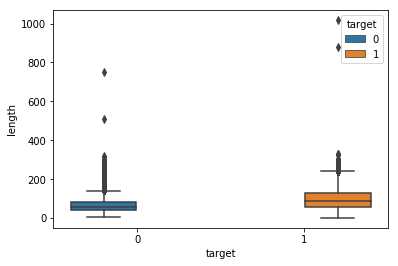

In [24]:
sns.boxplot(x='target', y='length', hue='target', data=train_df, orient='v')
plt.show()

<b>Conclusion</b>

Length seems to be not much useful from the above plot

### Bad Word Count

Source :: https://github.com/RobertJGabriel/Google-profanity-words/blob/master/list.txt

In [32]:
bad_words_df = pd.read_csv('bad_words_list.txt')
bad_words_df.head()

,word
0,4r5e
1,5h1t
2,5hit
3,a55
4,anal


In [34]:
bad_words = list(bad_words_df['word'].values)

In [35]:
from tqdm import tqdm

In [36]:
def count_bad_words(question_texts):
    b_count = []
    for question in tqdm(question_texts):
        b_count.append(sum([1 for w in bad_words if w.lower() in question.lower()]))
    return b_count

In [37]:
train_df['bad_words_count'] = count_bad_words(train_df['question_text'].values)

100%|██████████| 1306122/1306122 [03:59<00:00, 5453.04it/s]


In [38]:
train_df['bad_words_count'].min()

0

In [39]:
train_df['bad_words_count'].max()

9

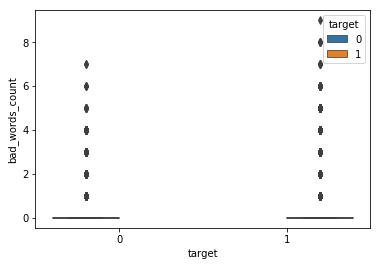

In [40]:
sns.boxplot(x='target', y='bad_words_count', hue='target', data=train_df, orient='v')
plt.show()

<b>Conclusion</b>

Bad word counts also seems to be not much useful from the above plot

### Country Count

In [41]:
with open('country_list.txt') as f:
    country_list = [x.lower().replace('\n', '') for x in f.readlines()]

In [42]:
country_list[:5]

['afghanistan', 'albania', 'algeria', 'andorra', 'angola']

In [43]:
def count_country(question_texts):
    b_count = []
    for question in tqdm(question_texts):
        b_count.append(sum([1 for w in country_list if w in question.lower()]))
    return b_count

In [44]:
train_df['country_count'] = count_country(train_df['question_text'].values)

100%|██████████| 1306122/1306122 [01:22<00:00, 15905.15it/s]


In [45]:
train_df['country_count'].min()

0

In [46]:
train_df['country_count'].max()

20

In [53]:
train_df[train_df['country_count'] == train_df['country_count'].max()]

,qid,question_text,target,length,bad_words_count,country_count
687811,86b8bb72262fd2b4076b,Is Infrastructure of India really better than ...,0,233,0,20


In [55]:
print(train_df[train_df['country_count'] == train_df['country_count'].max()]['question_text'].values[0])

Is Infrastructure of India really better than Portugal, New Zealand, Panama, Bahrain, Thailand, Oman, Egypt, Saudi Arabia, Kuwait, Mexico, Brazil, Indonesia, Vietnam, Argentina, Brunei, Philippines, Colombia, Iran, Russia & Maldives?


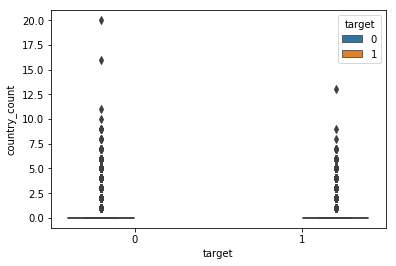

In [56]:
sns.boxplot(x='target', y='country_count', hue='target', data=train_df, orient='v')
plt.show()

<b>Conclusion</b>

country_count also seems to be not much useful from the above plot

### Sentence Count

In [57]:
train_df['count_sent'] = train_df["question_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [60]:
train_df['count_sent'].min(), train_df['count_sent'].max() 

(1, 15)

In [62]:
train_df[train_df['count_sent'] == train_df['count_sent'].max()]

,qid,question_text,target,length,bad_words_count,country_count,count_sent
522266,663c7523d48f5ee66a3e,"In ""Star Trek 2013"" why did they :\n\n*Spoiler...",0,752,2,0,15


In [63]:
train_df[train_df['count_sent'] == train_df['count_sent'].max()]['question_text'].values[0]

'In "Star Trek 2013" why did they :\n\n*Spoilers*\n*Spoilers*\n*Spoilers*\n*Spoilers*\n\n1)Make warping look quite a bit like an hyperspace jump\n2)what in the world were those bright particles as soon as they jumped.\n3)Why in the world did they make it possible for two entities to react in warp space in separate jumps.\n4)Why did Spock get emotions for this movie.\n5)What was the point of hiding the "Enterprise" underwater.\n6)When they were intercepted by the dark ship, how come they reached Earth when they were far away from her.(I don\'t seem to remember the scene where they warp to earth).\n7)How did the ship enter earth\'s atmosphere when it wasnt even in orbit.\n8)When Scotty opened the door of the black ship , how come pike and khan didn\'t slow down?'

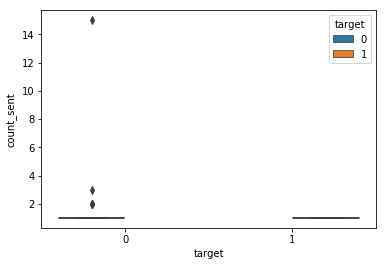

In [64]:
sns.boxplot(x='target', y='count_sent', hue='target', data=train_df, orient='v')
plt.show()

### Word Count

In [65]:
train_df['count_word'] = train_df["question_text"].apply(lambda x: len(str(x).split()))

In [66]:
train_df['count_word'].min(), train_df['count_word'].max() 

(1, 134)

In [67]:
train_df[train_df['count_word'] == train_df['count_word'].max()]

,qid,question_text,target,length,bad_words_count,country_count,count_sent,count_word
522266,663c7523d48f5ee66a3e,"In ""Star Trek 2013"" why did they :\n\n*Spoiler...",0,752,2,0,15,134


In [68]:
train_df[train_df['count_word'] == train_df['count_word'].max()]['question_text'].values[0]

'In "Star Trek 2013" why did they :\n\n*Spoilers*\n*Spoilers*\n*Spoilers*\n*Spoilers*\n\n1)Make warping look quite a bit like an hyperspace jump\n2)what in the world were those bright particles as soon as they jumped.\n3)Why in the world did they make it possible for two entities to react in warp space in separate jumps.\n4)Why did Spock get emotions for this movie.\n5)What was the point of hiding the "Enterprise" underwater.\n6)When they were intercepted by the dark ship, how come they reached Earth when they were far away from her.(I don\'t seem to remember the scene where they warp to earth).\n7)How did the ship enter earth\'s atmosphere when it wasnt even in orbit.\n8)When Scotty opened the door of the black ship , how come pike and khan didn\'t slow down?'

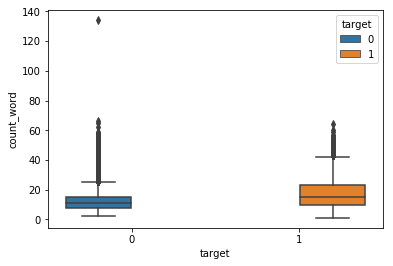

In [69]:
sns.boxplot(x='target', y='count_word', hue='target', data=train_df, orient='v')
plt.show()

<b>Conclusion</b>

count_word also seems to be not much useful from the above plot

### Stop Word Count

In [70]:
train_df["count_stopwords"] = train_df["question_text"].apply(lambda x: \
                                                len([w for w in str(x).lower().split() if w in STOPWORDS]))

In [71]:
train_df['count_stopwords'].min(), train_df['count_stopwords'].max() 

(0, 58)

In [72]:
train_df[train_df['count_stopwords'] == train_df['count_stopwords'].max()]

,qid,question_text,target,length,bad_words_count,country_count,count_sent,count_word,count_stopwords
522266,663c7523d48f5ee66a3e,"In ""Star Trek 2013"" why did they :\n\n*Spoiler...",0,752,2,0,15,134,58


In [74]:
train_df[train_df['count_stopwords'] == train_df['count_stopwords'].max()]['question_text'].values[0]

'In "Star Trek 2013" why did they :\n\n*Spoilers*\n*Spoilers*\n*Spoilers*\n*Spoilers*\n\n1)Make warping look quite a bit like an hyperspace jump\n2)what in the world were those bright particles as soon as they jumped.\n3)Why in the world did they make it possible for two entities to react in warp space in separate jumps.\n4)Why did Spock get emotions for this movie.\n5)What was the point of hiding the "Enterprise" underwater.\n6)When they were intercepted by the dark ship, how come they reached Earth when they were far away from her.(I don\'t seem to remember the scene where they warp to earth).\n7)How did the ship enter earth\'s atmosphere when it wasnt even in orbit.\n8)When Scotty opened the door of the black ship , how come pike and khan didn\'t slow down?'

In [75]:
train_df[train_df['count_stopwords'] == train_df['count_stopwords'].min()]['question_text'].values[0]

'Consciousness bruuuuuu shshshd D D d?'

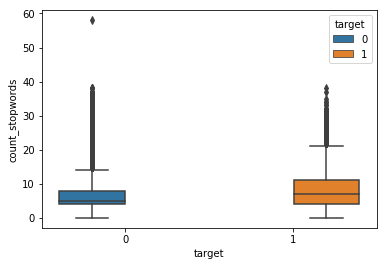

In [76]:
sns.boxplot(x='target', y='count_stopwords', hue='target', data=train_df, orient='v')
plt.show()

<b>Conclusion</b>

count_stopwords also seems to be not much useful from the above plot

### Punctuation count

In [77]:
train_df["count_punctuations"] = train_df["question_text"].apply(lambda x: \
                                                            len([c for c in str(x) if c in string.punctuation]))

In [78]:
train_df['count_punctuations'].min(), train_df['count_punctuations'].max() 

(0, 411)

In [79]:
train_df[train_df['count_punctuations'] == train_df['count_punctuations'].max()]

,qid,question_text,target,length,bad_words_count,country_count,count_sent,count_word,count_stopwords,count_punctuations
443216,56da6b6875d686b48fde,What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan...,1,1017,0,0,1,45,5,411


In [80]:
train_df[train_df['count_punctuations'] == train_df['count_punctuations'].max()]['question_text'].values[0]

"What is [math]\\frac{\\int_{1x^5}^{3x^{-5}} \\tan(\\tan({\\boxed{\\int_{1x^0}^{1x^2} \\sum_{\\varpi=1}^{\\infty} \\int_{2x^{-3}}^{2x^2} \\sum_{\\alpha=7}^{\\infty} \\underbrace{\\sqrt[2]{1x^5}}_{\\text{Gauss's Law of Theoretical Probability.}} d\\tau dx}}^{1x^0})) d\\mu}{\\int_{2x^{-3}}^{1x^5} \\cos(\\int_{2x^2}^{1x^{-3}} \\frac{\\sqrt[2]{\\overbrace{\\underbrace{\\frac{3x^3+3x^5}{\\sqrt[3]{2x^{-3}}}}_{\\text{Gauss's Law of Theoretical Probability.}} \\times \\overbrace{\\tan(2x^0)}^{\\text{Gauss's Law of Theoretical Probability.}}-\\sum_{4=7}^{\\infty} \\boxed{3x^{-5}}}^{\\text{Inverse Function.}}}}{{\\boxed{\\int_{2x^2}^{2x^4} 3x^1 d9} \\div \\sum_{6=6}^{\\infty} \\sqrt[3]{2x^2}+\\sqrt[4]{\\sin(2x^0+3x^0)}}^{2x^{-4}}+\\boxed{\\frac{\\vec{\\boxed{\\sum_{\\gamma=10}^{\\infty} 1x^{-5}}}}{\\frac{\\sum_{\\iota=2}^{\\infty} 1x^{-5}-\\frac{3x^{-1}}{1x^{-4}}}{\\sin(\\tan(3x^{-2}))}}}} \\times \\boxed{\\sqrt[2]{{{{\\sqrt[5]{2x^5}}^{2x^{-1}}}^{2x^{-1}} \\div \\sum_{\\chi=6}^{\\infty} \\int_{1

In [81]:
train_df[train_df['count_punctuations'] == train_df['count_punctuations'].min()]['question_text'].values[0]

'What is a laughing box'

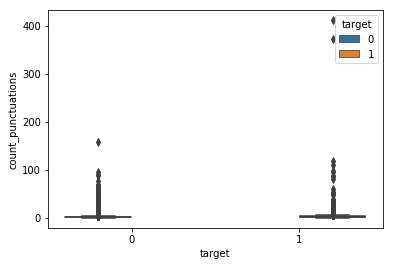

In [82]:
sns.boxplot(x='target', y='count_punctuations', hue='target', data=train_df, orient='v')
plt.show()

<b>Conclusion</b>

count_punctuations also seems to be not much useful from the above plot

### Average word length

In [83]:
train_df["avg_word_len"] = train_df["question_text"].apply(lambda x: \
                                                            np.mean([len(w) for w in str(x).split()]))

In [84]:
train_df['avg_word_len'].min(), train_df['avg_word_len'].max() 

(1.0, 57.666666666666664)

In [85]:
train_df[train_df['avg_word_len'] == train_df['avg_word_len'].max()]

,qid,question_text,target,length,bad_words_count,country_count,count_sent,count_word,count_stopwords,count_punctuations,avg_word_len
455194,592d9f9f0bcdca6e83fa,ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ...,1,175,0,0,1,3,0,1,57.666667


In [86]:
train_df[train_df['avg_word_len'] == train_df['avg_word_len'].max()]['question_text'].values[0]

'ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZzzzzzzzzzzzzzzZZZZZZZZZZZZZZZZZZZzzzzzzzzzzzzzzzzzzzzzzz hi earth?'

In [87]:
train_df[train_df['avg_word_len'] == train_df['avg_word_len'].min()]['question_text'].values[0]

'"'

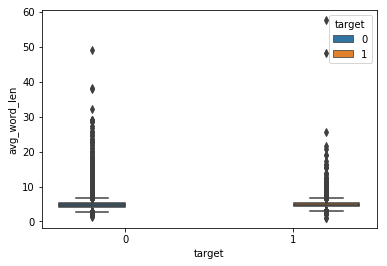

In [88]:
sns.boxplot(x='target', y='avg_word_len', hue='target', data=train_df, orient='v')
plt.show()

<b>Conclusion</b>

avg_word_len also seems to be not much useful from the above plot